# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

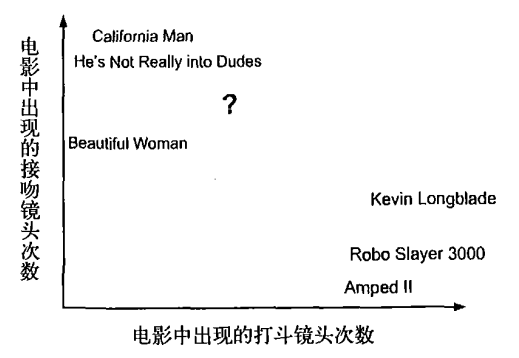

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

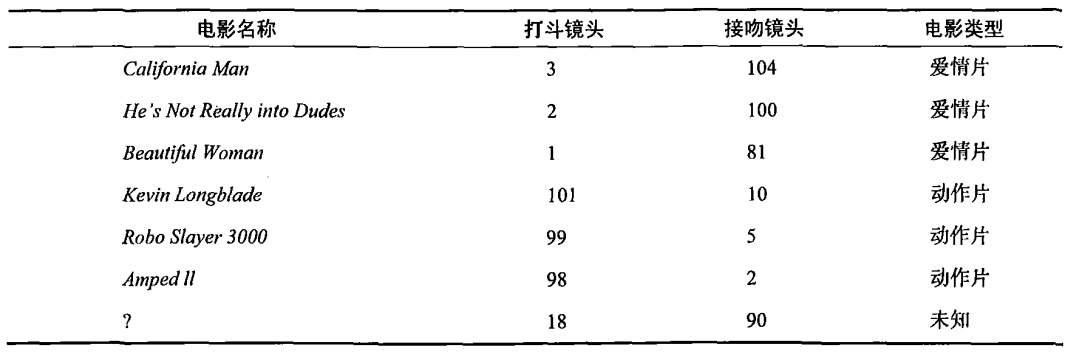

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

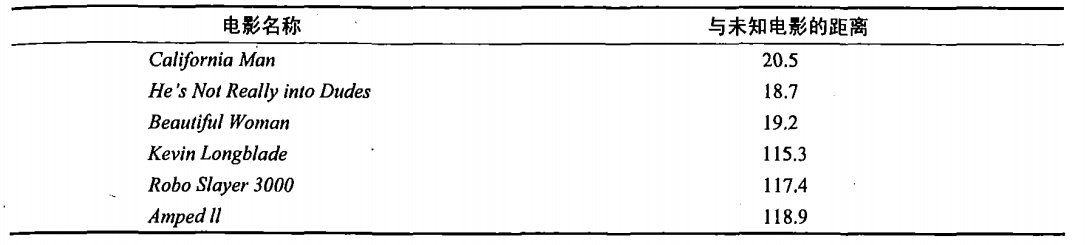

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

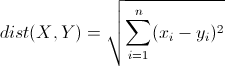

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

动作爱情电影分类分析

In [33]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [34]:
samples = pd.read_excel('../data/films.xlsx',sheet_name=1)

In [35]:
samples

,名字,动作镜头,爱情镜头,target
0,前任3,4,10,爱情片
1,西游记,16,2,动作片
2,战狼2,18,3,动作片
3,失恋33天,2,13,爱情片
4,宝贝计划,4,2,喜剧
5,捉妖记,10,10,动作片
6,乡村爱情,3,4,喜剧
7,阳光的快乐生活,2,3,喜剧
8,后来的你们,2,11,爱情片
9,大话西游,18,2,动作片


In [36]:
# 因为名字这一列对预测结果没有意义，所以删除（特征预处理）
X_train = samples[['动作镜头','爱情镜头']]
y_train = samples.target

In [37]:
X_train

,动作镜头,爱情镜头
0,4,10
1,16,2
2,18,3
3,2,13
4,4,2
5,10,10
6,3,4
7,2,3
8,2,11
9,18,2


In [38]:
y_train

0     爱情片
1     动作片
2     动作片
3     爱情片
4      喜剧
5     动作片
6      喜剧
7      喜剧
8     爱情片
9     动作片
10    爱情片
11    爱情片
Name: target, dtype: object

In [6]:
# KNN算法模型对象
# KNeighborsClassifier 处理分类问题
# KNeighborsRegressor 处理回归问题
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# 创建算法模型对象
knnclf = KNeighborsClassifier(n_neighbors=3)

In [40]:
# 分类算法属于有监督学习的范畴，训练过程需要同时制定样本特征和样本标签
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
# 使用算法模型进行数据预测
X_test = [[4,4],[3,19],[13,4]]
knnclf.predict(X_test)

array(['喜剧', '爱情片', '动作片'], dtype=object)

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [1]:
# datasets是一个数据集，这里面提供了大量的样本数据，可以通过各种函数获取到，用于研究机器学习算法模型
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

获取训练样本

In [4]:
data = iris.data
feature_names = iris.feature_names
target = iris.target

In [7]:
train = DataFrame(data=data,columns = feature_names)

In [8]:
train.shape

(150, 4)

In [9]:
train.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

绘制图形

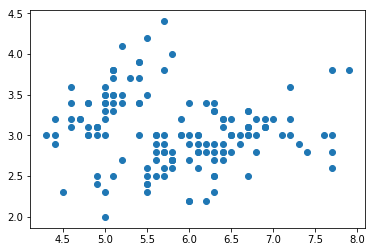

In [11]:
# 因为数据集有4列，所以特征空间是4维的，无法表示，所以以2维空间来绘制，只取前两个特征
train = train.values[:,:2]

In [27]:
# 创建一个颜色映射对象
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red','blue','green'])

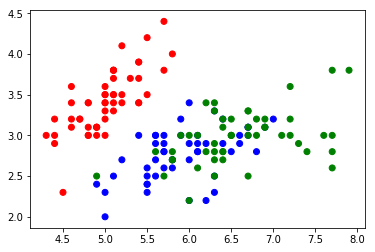

In [28]:
# c = [[1,0,0]]*50 + [[0,1,0]]*50 + [[0,0,1]]*50
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

In [23]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# n_neighbors是一个奇数，取值范围  1 < n_neighbors < 数据样本个数的平方根
knnclf = KNeighborsClassifier(n_neighbors=5)

定义KNN分类器

第一步，训练数据

In [31]:
%timeit knnclf.fit(train,target)

252 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [32]:
# 先确定测试数据样本点的样本区间
xmax,xmin = train[:,0].max()+0.5,train[:,0].min()-0.5
ymax,ymin = train[:,1].max()+0.5,train[:,1].min()-0.5

In [58]:
# 生成预测数据
x = np.linspace(xmin,xmax,250)
y = np.linspace(ymin,ymax,250)

xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

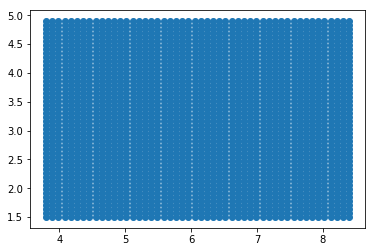

In [49]:
plt.scatter(X_test[:,0],X_test[:,1])

对数据进行预测

In [59]:
y_ = knnclf.predict(X_test)

In [52]:
Series(y_).unique()

array([1, 2, 0], dtype=int64)

In [53]:
len(y_)

2500

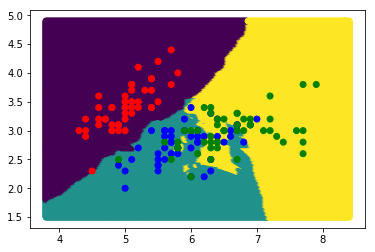

In [60]:
# 绘制预测点
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
# 绘制真实点（训练数据）
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

显示数据

### 2）用于回归  
回归用于对趋势的预测

In [61]:
from sklearn.neighbors import KNeighborsClassifier
# 回归问题用如下模型来处理
from sklearn.neighbors import KNeighborsRegressor

导包

生成样本数据

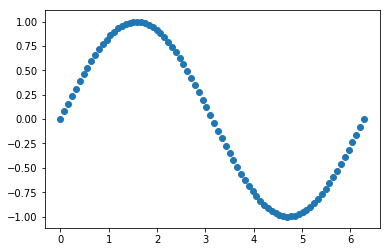

In [94]:
x = np.linspace(0,2*np.pi,80)
y = np.sin(x)
plt.scatter(x,y)

In [95]:
np.random.seed(5)
noise = np.random.random(size=20) - 0.5
noise

array([-0.27800683,  0.37073231, -0.29328084,  0.41861091, -0.01158881,
        0.11174386,  0.26590786,  0.01841799, -0.2031995 , -0.31227877,
       -0.41925873,  0.2384403 , -0.05869078, -0.34169013,  0.37993703,
       -0.22591354, -0.08576498, -0.20392007,  0.12878791,  0.07983781])

In [96]:
y[::4] += noise

生成测试数据的结果

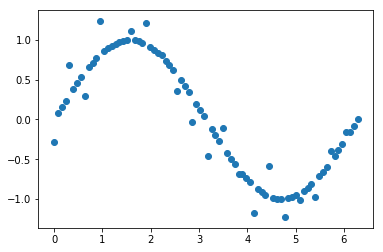

In [97]:
plt.scatter(x,y)

第一步：生成模型，并训练数据

In [98]:
train = x.reshape(-1,1)
target = y

In [106]:
knnrgr = KNeighborsRegressor(n_neighbors=11)
knnrgr.fit(train,target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='uniform')

第二步：使用模型，预测数据

In [107]:
# 训练数据
X_test = np.linspace(train.min(),train.max(),100).reshape(-1,1)
y_ = knnrgr.predict(X_test)

绘图显示数据

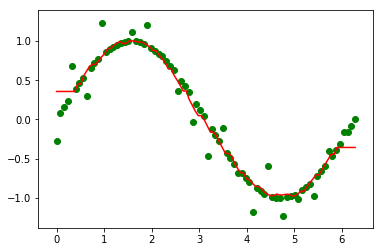

In [108]:
plt.plot(X_test,y_,color='red')
plt.scatter(train,target,color='green')

In [ ]:
拟合程度  最佳拟合  过拟合（泛化能力变差） 欠拟合(预测精度过低)都不好

泛化能力 

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [109]:
# 确认要处理的业务属于分类业务，所以采用KNN分类算法
# 了解算法原理、了解算法能处理什么类型的问题、优缺点

from sklearn.neighbors import KNeighborsClassifier

获取数据

In [110]:
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [111]:
X_train.shape

(7352, 561)

In [118]:
X_test.shape

(2947, 561)

In [145]:
label = {1:'WALKING', 
         2:'WALKING UPSTAIRS', 
         3:'WALKING DOWNSTAIRS',
         4:'SITTING', 
         5:'STANDING', 
         6:'LAYING'}

In [130]:
7352**0.5

85.74380444090407

In [136]:
knnclf = KNeighborsClassifier(n_neighbors=17)

In [137]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [138]:
# 预留测试集的目的就是为了评估模型的好坏
y_ = knnclf.predict(X_test)

In [127]:
# 算法评估
y_

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [128]:
y_test

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [139]:
(y_ == y_test).sum()/y_.size

0.9053274516457415

In [135]:
# 每一个分类模型，都可以使用score方法，来直接对模型进行算法评分
knnclf.score(X_test,y_test)

0.8887003732609433

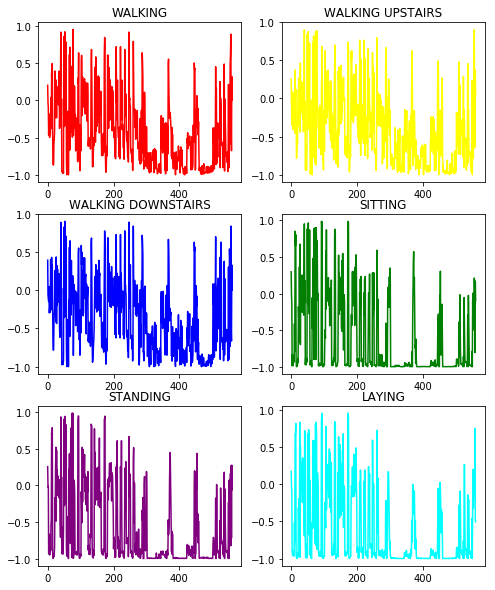

In [150]:
# 绘图展示每一个动作的数据分布规律

color_list = ['red','yellow','blue','green','purple','cyan']
plt.figure(figsize=(8,10))
for i in range(1,7):
    axes = plt.subplot(3,2,i)
    axes.plot(X_test[y_test == i][0],color=color_list[i-1])
    title = label[i]
    axes.set_title(title)

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [152]:
adults = pd.read_csv('../data/adults.txt')

In [153]:
adults.shape

(32561, 15)

In [154]:
adults.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

In [155]:
adults.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
# 0.2比例  8:2

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度